# Deep learning with keras

First we import all required packages. Keras will import tensorflow underwater and will act as a so to speak 'interface' of the tensorflow backend.

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print(f'Found GPU at {device_name}')

Found GPU at /device:GPU:0


In [25]:
import numpy as np
import keras
import random
import rasterio
import pandas as pd
from keras.utils import np_utils
import cv2
import os
from pathlib import Path, PureWindowsPath

%matplotlib inline

This notebook contain three examples. A fully conntecte neuralnetwork, a convolutional neuralnetwork and a fully convolutional neuralnetwork.

In eacht of thesere three cases we simply define a data generator, an architecture and a loss. After that we train the architecture using the generator with the respective loss.

Lastly we validate the model on some unseen validation data.

## A fully connected neuralnetwork

We fix some helpful parameters that we might want to the tune.

In [8]:
classes = 3
epochs = 10
lr = 0.0001
split = 0.2

First we read the full iris dataset. The first four columns describe properites of the flower, the last column tells us what kind of flower we are dealing with.

In [9]:
data = pd.read_csv('iris_data.txt', header = None)
data.columns = ['prop1', 'prop2', 'prop3', 'prop4', 'type']
type_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2} 


data['type_int'] = [type_int[item] for item in data['type'].values]

indices_test = random.sample(list(np.arange(data.shape[0])), round(split*data.shape[0]))
indices_train = set(np.arange(data.shape[0])) - set(indices_test)

test_data = data.loc[list(indices_test)]
train_data = data.loc[list(indices_train)]
train_data


,prop1,prop2,prop3,prop4,type,type_int
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
6,4.6,3.4,1.4,0.3,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
9,4.9,3.1,1.5,0.1,Iris-setosa,0
10,5.4,3.7,1.5,0.2,Iris-setosa,0
11,4.8,3.4,1.6,0.2,Iris-setosa,0


Next we define a generator based on this table.

In [7]:
def generator(data,classes):
    while True:
        indices = np.arange(data.shape[0])
        random.shuffle(indices)
        data = data.iloc[indices]
        for i in np.arange(data.shape[0]):
           input = [data['prop1'].values[i],data['prop2'].values[i],data['prop3'].values[i],data['prop4'].values[i]]
           label =  [data['type_int'].values[i]]
           label = np_utils.to_categorical(label,classes)
           input = np.array([input])
           yield([input,label])


Lastly we define the model architecture

In [8]:
input =keras.engine.Input( shape = [4], dtype = 'float32' )

l0 = keras.layers.Dense(units = 8, activation = 'relu' )(input)
l1 = keras.layers.Dense(units = 16, activation = 'relu' )(l0)
l2 = keras.layers.Dense(units = 32, activation = 'relu' )(l1)
l3 = keras.layers.Dense(units = 16, activation = 'relu' )(l2)
l4 = keras.layers.Dense(units = 8, activation = 'relu' )(l3)
output = keras.layers.Dense(units = classes, activation = 'softmax' )(l4)

model = keras.models.Model(inputs = input, outputs = output)


In [9]:
opt = keras.optimizers.adam( lr= lr ,  clipnorm = 0.3 )
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ["accuracy"])

With the data generator, network architecture and loss defined we can now train the model.

In [10]:
model.fit_generator(generator = generator(train_data,classes), steps_per_epoch = train_data.shape[0], epochs = epochs)

Epoch 1/10
120/120 [==============================] - 2s 15ms/step - loss: 1.1013 - acc: 0.3833
Epoch 2/10
120/120 [==============================] - 1s 6ms/step - loss: 0.9493 - acc: 0.3333
Epoch 3/10
120/120 [==============================] - 1s 6ms/step - loss: 0.8864 - acc: 0.4417
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.8350 - acc: 0.6167
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.7784 - acc: 0.6750
Epoch 6/10
120/120 [==============================] - 1s 6ms/step - loss: 0.7534 - acc: 0.6750
Epoch 7/10
120/120 [==============================] - 1s 6ms/step - loss: 0.7054 - acc: 0.6750
Epoch 8/10
120/120 [==============================] - 1s 6ms/step - loss: 0.7072 - acc: 0.6750
Epoch 9/10
120/120 [==============================] - 1s 6ms/step - loss: 0.6889 - acc: 0.6750
Epoch 10/10
120/120 [==============================] - 1s 6ms/step - loss: 0.7055 - acc: 0.6750


Now let's see how well we did

In [11]:
model.evaluate_generator(generator(test_data,classes), steps = test_data.shape[0])

[0.75319453155001, 0.6333333333333333]

## A convolutional neuralnetwork

In [10]:
classes = 62
epochs = 4
w = 60
lr = 0.0001
split = 0.2

First we load the data, or in this case the metadata.

In [13]:
dirs = os.listdir('borden')
data = pd.DataFrame(columns = ['label','file'])

i = 0
for dir in dirs:
    files = os.listdir(os.path.join('borden',dir))
    for file in files:
        data.loc[i] = [int(dir), os.path.join('borden',dir, file)]
        i = i+1

indices_test = random.sample(list(np.arange(data.shape[0])), round(split*data.shape[0]))
indices_train = set(np.arange(data.shape[0])) - set(indices_test)

test_data = data.loc[list(indices_test)]
train_data = data.loc[list(indices_train)]
train_data


,label,file
0,0,borden\00000\1.png
1,0,borden\00000\10.png
2,0,borden\00000\11.png
3,0,borden\00000\12.png
4,0,borden\00000\13.png
6,0,borden\00000\15.png
7,0,borden\00000\16.png
10,0,borden\00000\19.png
11,0,borden\00000\2.png
12,0,borden\00000\20.png


In [14]:
def generator(data,classes):
    while True:
        indices = np.arange(data.shape[0])
        random.shuffle(indices)
        data = data.iloc[indices]
        for i in np.arange(data.shape[0]):
            try:
               input = cv2.imread(data['file'].values[i])
               input = cv2.resize(input, (w,w))
               label =  [data['label'].values[i]]
               label = np_utils.to_categorical(label,classes)
               input = np.expand_dims(input, axis = 0)
               yield([input,label])
            except GeneratorExit as e:
                print(e)
            except:
               print(data['file'].values[i]) 



In [24]:
input =keras.engine.Input( shape = [w,w,3], dtype = 'float32' )

# Architectuur, dus volgorde van acties
l0 = keras.layers.convolutional.Conv2D( filters=16, kernel_size= (3,3),padding="same", activation = 'relu' )(input)
l1 = keras.layers.MaxPool2D(pool_size = (2,2))(l0)
l2 = keras.layers.convolutional.Conv2D( filters=32, kernel_size= (3,3),padding="same", activation = 'relu' )(l1)
l3 = keras.layers.MaxPool2D(pool_size = (2,2))(l2)
l4 = keras.layers.convolutional.Conv2D( filters=64, kernel_size= (3,3),padding="same", activation = 'relu' )(l3)
l5 = keras.layers.Flatten()(l4)
l6 = keras.layers.Dense(units = 128, activation = 'relu' )(l5)
l7 = keras.layers.Dense(units = 256, activation = 'relu' )(l6)
output = keras.layers.Dense(units = classes, activation = 'softmax' )(l7)

model = keras.models.Model(inputs = input, outputs = output)

In [16]:
opt = keras.optimizers.adam( lr= lr ,  clipnorm = 0.3 )
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ["accuracy"])

In [17]:
model.fit_generator(generator = generator(train_data,classes), steps_per_epoch = train_data.shape[0], epochs = epochs)

Epoch 1/4
5521/5521 [==============================] - 69s 13ms/step - loss: 15.5412 - acc: 0.0353
Epoch 2/4
5521/5521 [==============================] - 67s 12ms/step - loss: 15.5517 - acc: 0.0351
Epoch 3/4
5521/5521 [==============================] - 67s 12ms/step - loss: 15.5517 - acc: 0.0351
Epoch 4/4
5521/5521 [==============================] - 66s 12ms/step - loss: 15.5517 - acc: 0.0351



Exception ignored in: <generator object generator at 0x0000018E73480150>
RuntimeError: generator ignored GeneratorExit


In [18]:
model.evaluate_generator(generator(test_data,classes), steps = test_data.shape[0])

Exception ignored in: <generator object generator at 0x0000018E734800F8>
RuntimeError: generator ignored GeneratorExit


[15.499067101012105, 0.03840579710144928]

## A fully convolutional neuralnetwork

In [11]:
classes = 2
epochs = 4
w = 512
lr = 0.0001
split = 0.2

In [12]:
basepath = 'D:\\data\\open\\deeplearning_tutorial\\data'
files = os.listdir(os.path.join(basepath, 'clouds','labels'))
images = [os.path.join(basepath, 'clouds', 'images', file.replace('.txt', '.jpg')) for file in files]
labels = [os.path.join(basepath, 'clouds', 'labels', file) for file in files]

# "files = os.listdir(os.path.join('clouds','labels'))\n",
#     "images = [os.path.join(os.paht.join('clouds','images'), file.replace('.txt', '.jpg')) for file in files]\n",
# "labels = [os.path.join('clouds','labels',file) for file in files]\n"

data = pd.DataFrame({'image': images, 'label': labels})
indices_test = random.sample(list(np.arange(data.shape[0])), round(split*data.shape[0]))
indices_train = set(np.arange(data.shape[0])) - set(indices_test)

test_data = data.loc[list(indices_test)]
train_data = data.loc[list(indices_train)]
train_data

,image,label
0,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
1,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
2,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
3,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
4,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
6,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
7,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
8,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
9,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...
10,D:\data\open\deeplearning_tutorial\data\clouds...,D:\data\open\deeplearning_tutorial\data\clouds...


In [21]:
def generator(data,classes):
    while True:
        indices = np.arange(data.shape[0])
        random.shuffle(indices)
        data = data.iloc[indices]
        for i in np.arange(data.shape[0]):
            label = np.genfromtxt(data['label'].values[i], delimiter = ',')
            label = label.astype(np.int32)
            label = np_utils.to_categorical(label, classes)
            label = np.expand_dims(label, axis = 0)
            input = cv2.imread(data['image'].values[i])
            input = np.expand_dims(input, axis = 0)
            yield([input,label])


In [22]:
input =keras.engine.Input( shape = [w,w,3], dtype = 'float32' )

l0 = keras.layers.convolutional.Conv2D( filters=64, kernel_size= (3,3),padding="same",     activation = 'relu' )(input)
l0 = keras.layers.convolutional.Conv2D( filters=64, kernel_size= (3,3),padding="same",     activation = 'relu' )(l0)
  
l1 = keras.layers.MaxPool2D(pool_size = (2,2))(l0)
l1 = keras.layers.convolutional.Conv2D( filters=128, kernel_size= (3,3),padding="same",     activation = 'relu' )(l1)
l1 = keras.layers.convolutional.Conv2D( filters=128, kernel_size= (3,3),padding="same",     activation = 'relu' )(l1)

l2 = keras.layers.MaxPool2D(pool_size = (2,2))(l1)
l2 = keras.layers.convolutional.Conv2D( filters=256, kernel_size= (3,3),padding="same",     activation = 'relu' )(l2)
l2 = keras.layers.convolutional.Conv2D( filters=256, kernel_size= (3,3),padding="same",     activation = 'relu' )(l2)

l3 = keras.layers.MaxPool2D(pool_size = (2,2))(l2)
l3 = keras.layers.convolutional.Conv2D( filters=512, kernel_size= (3,3),padding="same",     activation = 'relu' )(l3)
l3 = keras.layers.convolutional.Conv2D( filters=512, kernel_size= (3,3),padding="same",     activation = 'relu' )(l3)

l4 = keras.layers.MaxPool2D(pool_size = (2,2))(l3)
l4 = keras.layers.convolutional.Conv2D( filters=1024, kernel_size= (3,3),padding="same",     activation = 'relu' )(l4)
l4 = keras.layers.convolutional.Conv2D( filters=1024, kernel_size= (3,3),padding="same",     activation = 'relu' )(l4)


l3_up = keras.layers.convolutional.Conv2DTranspose(filters = 512 , kernel_size=(3,3) ,strides = (2, 2), padding="same")(l4)
l3_up = keras.layers.concatenate([l3,l3_up])
l3_up = keras.layers.convolutional.Conv2D( filters=512, kernel_size= (3,3),padding="same",     activation = 'relu' )(l3_up)
l3_up = keras.layers.convolutional.Conv2D( filters=512, kernel_size= (3,3),padding="same",     activation = 'relu' )(l3_up)

l2_up = keras.layers.convolutional.Conv2DTranspose(filters = 256 , kernel_size=(3,3) ,strides = (2, 2), padding="same")(l3_up)
l2_up = keras.layers.concatenate([l2,l2_up])
l2_up = keras.layers.convolutional.Conv2D( filters=256, kernel_size= (3,3),padding="same",     activation = 'relu' )(l2_up)
l2_up = keras.layers.convolutional.Conv2D( filters=256, kernel_size= (3,3),padding="same",     activation = 'relu' )(l2_up)

l1_up = keras.layers.convolutional.Conv2DTranspose(filters = 128 , kernel_size=(3,3) ,strides = (2, 2), padding="same")(l2_up)
l1_up = keras.layers.concatenate([l1,l1_up])
l1_up = keras.layers.convolutional.Conv2D( filters=128, kernel_size= (3,3),padding="same",     activation = 'relu' )(l1_up)
l1_up = keras.layers.convolutional.Conv2D( filters=128, kernel_size= (3,3),padding="same",     activation = 'relu' )(l1_up)

l0_up = keras.layers.convolutional.Conv2DTranspose(filters = 64 , kernel_size=(3,3) ,strides = (2, 2), padding="same")(l1_up)
l0_up = keras.layers.concatenate([l0,l0_up])
l0_up = keras.layers.convolutional.Conv2D( filters=64, kernel_size= (3,3),padding="same",     activation = 'relu' )(l0_up)
l0_up = keras.layers.convolutional.Conv2D( filters=64, kernel_size= (3,3),padding="same",     activation = 'relu' )(l0_up)

output = keras.layers.convolutional.Conv2D( filters=classes, kernel_size= (1,1),padding="same",     activation = 'softmax' )(l0_up)

model = keras.models.Model(inputs = input, outputs = output)


In [23]:
opt = keras.optimizers.adam( lr= lr ,  clipnorm = 0.3 )
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics = ["accuracy"])

In [24]:
model.fit_generator(generator = generator(train_data,classes), steps_per_epoch = train_data.shape[0], epochs = epochs)

Epoch 1/4
3930/3930 [==============================] - 6911s 2s/step - loss: 0.7520 - acc: 0.6932
Epoch 2/4
3930/3930 [==============================] - 4059s 1s/step - loss: 0.5356 - acc: 0.7983
Epoch 3/4
3930/3930 [==============================] - 4070s 1s/step - loss: 0.3617 - acc: 0.8785
Epoch 4/4
3930/3930 [==============================] - 4053s 1s/step - loss: 0.2998 - acc: 0.9023


In [25]:
model.evaluate_generator(generator(test_data,classes), steps = test_data.shape[0])

[0.29362923676748487, 0.9171337698143835]

In [45]:
model.save('model.hd5')

In [37]:
import imp

In [38]:
imp.reload(download)
import cover

In [39]:
# download(x1, x2, y1, y2,   window,  data_folder, width = 512, height = 512,  satellite_id='L1C')
cov = cover.main('D:/data/open/deeplearning_tutorial/data/provincies/Drenthe/area.shp')

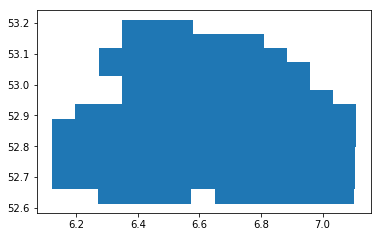

In [40]:
cov.plot()

In [42]:
cov

,geometry,x1,x2,y1,y2,id
2,"POLYGON ((6.271539393623512 52.61323812355103,...",6.271539,6.347128,52.613238,52.659245,0
3,"POLYGON ((6.347127997266838 52.61323812355103,...",6.347128,6.422717,52.613238,52.659245,1
4,"POLYGON ((6.422716600910163 52.61323812355103,...",6.422717,6.498305,52.613238,52.659245,2
5,"POLYGON ((6.498305204553489 52.61323812355103,...",6.498305,6.573894,52.613238,52.659245,3
7,"POLYGON ((6.64948241184014 52.61323812355103, ...",6.649482,6.725071,52.613238,52.659245,4
8,"POLYGON ((6.725071015483466 52.61323812355103,...",6.725071,6.800660,52.613238,52.659245,5
9,"POLYGON ((6.800659619126791 52.61323812355103,...",6.800660,6.876248,52.613238,52.659245,6
10,"POLYGON ((6.876248222770117 52.61323812355103,...",6.876248,6.951837,52.613238,52.659245,7
11,"POLYGON ((6.951836826413443 52.61323812355103,...",6.951837,7.027425,52.613238,52.659245,8
12,"POLYGON ((7.027425430056768 52.61323812355103,...",7.027425,7.103014,52.613238,52.659245,9


In [41]:
data_folder = 'D:/data/temp'
window = ('2019-01-01', ' 2019-02-20')
download.download(6.422717, 6.498305, 52.613238, 52.659245,   window,  data_folder, width = 512, height = 512,  satellite_id='L1C')

True

In [60]:
from sentinelhub import WmsRequest
import PIL
from PIL import Image

from IPython.display import display
from IPython.display import Image as _Imgdis

In [89]:
def pred_img(image_path):
    img = cv2.imread(image_path)
    #print(img)
    img_exp = np.expand_dims(img, 0)
    #print(img_exp)
    return model.predict(img_exp)

In [135]:
image_path = 'D:\\data\\temp\\' # wms_ALL-BANDS-L1C_EPSG4326_6.422717_52.613238_6.498305_52.659245_2019-01-01T10-56-15_512X512_AtmFilter_ATMCOR_ShowLogo_False_Transparent_True_tiff_depth=32f.jpg'
#img = Image.open(image_path)
# #img = keras.preprocessing.image.load_img(image_path)
# img = cv2.imread(image_path)
# # cv2.
# img_exp = np.expand_dims(img, 0)
# #x = keras.preprocessing.image.img_to_array(img)
# #model.summary()
# pred = model.predict(img_exp)

images = [os.path.join(image_path, file) for file in os.listdir(image_path)]
predictions = [pred_img(image) for image in images]
    
result = pd.DataFrame({'image_path':images})#, 'loss':predictions[0][0], 'accuracy':predictions[0][1]})
#predictions_df = pd.DataFrame([prediction for prediction in predictions])
#     result['filepath'] = os.path.join(image_path, file)
#     result['prediction'] = pred_img(os.path.join(image_path, file))

In [131]:
qq = pd.DataFrame(predictions)

In [132]:
qq

,0,1
0,0.931354,0.068646


In [136]:
result

,image_path
0,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
1,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
2,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
3,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
4,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
5,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
6,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
7,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
8,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
9,D:\data\temp\wms_ALL-BANDS-L1C_EPSG4326_6.4227...
